## Mô hình Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
from os import walk
filenames = next(walk('./data/data'), (None, None, []))[2]  # [] if no file
filename = filenames[-1]
df = pd.read_csv(f'./data/data/{filename}')
df.head()

,Thời tiết,Nhiệt độ,Độ ẩm,Gió,Áp suất,PM2.5,PM10,O3,NO2,SO2,CO,target
0,Trời quang,11°C,52%,8.8 km/h,1017 mbar,61.3,185.3,2,52.2,10.4,1160.0,Không lành mạnh
1,Trời quang,12°C,44%,9.4 km/h,1016 mbar,139.2,245.5,4.5,44.6,8.8,1150.0,Không lành mạnh
2,Nhiều mây,-4°C,45%,5 km/h,1036 mbar,157,416.5,9,59,27.5,NaN,Rất không lành mạnh
3,Sương mù,12°C,87%,7.4 km/h,1016 mbar,123.9,222.3,23,54.8,NaN,NaN,Không lành mạnh
4,Trời quang,12°C,56%,7.1 km/h,1016 mbar,83.3*,NaN,NaN,NaN,NaN,NaN,Không lành mạnh


### Chuyển các string thành số


In [ ]:
weather = ['Nhiều mây', 'Trời quang', 'Mưa', 'Mây rải rác', 'Sương mù', 'Ít mây', 'Tuyết', 'Mưa rào', 'Giông bão']
target = ['Tốt', 'Trung bình', 'Không lành mạnh', 'Không lành mạnh cho các nhóm nhạy cảm', 
          'Rất không lành mạnh', 'Nguy hiểm']
df = df.replace(weather, np.arange(len(weather)))
df = df.replace(target, np.arange(len(target)))
df.head()

,Thời tiết,Nhiệt độ,Độ ẩm,Gió,Áp suất,PM2.5,PM10,O3,NO2,SO2,CO,target
0,1,11°C,52%,8.8 km/h,1017 mbar,61.3,185.3,2,52.2,10.4,1160.0,2
1,1,12°C,44%,9.4 km/h,1016 mbar,139.2,245.5,4.5,44.6,8.8,1150.0,2
2,0,-4°C,45%,5 km/h,1036 mbar,157,416.5,9,59,27.5,NaN,4
3,4,12°C,87%,7.4 km/h,1016 mbar,123.9,222.3,23,54.8,NaN,NaN,2
4,1,12°C,56%,7.1 km/h,1016 mbar,83.3*,NaN,NaN,NaN,NaN,NaN,2


In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    df['Nhiệt độ'] = df['Nhiệt độ'].str.replace('°C', '')
    df['Độ ẩm'] = df['Độ ẩm'].str.replace('%', '')
    df['Gió'] = df['Gió'].str.replace(' km/h', '')
    df['Áp suất'] = df['Áp suất'].str.replace(' mbar', '')
    df[' PM2.5 '] = df[' PM2.5 '].str.replace('*', '')
    df[' PM10 '] = df[' PM10 '].str.replace('*', '')
    df[' O3 '] = df[' O3 '].str.replace('*', '')
    df[' NO2 '] = df[' NO2 '].str.replace('*', '')
    df[' SO2 '] = df[' SO2 '].str.replace('*', '')

df = df.astype(np.float64)
df.dtypes

In [ ]:
X = df.iloc[:, :-1]
Y = df['target']

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(X)
X = imputer.transform(X)

Thời tiết    0
Nhiệt độ     0
Độ ẩm        0
Gió          0
Áp suất      0
 PM2.5       0
 PM10        0
 O3          0
 NO2         0
 SO2         0
 CO          0
target       0
dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [ ]:
mymodel = linear_model.LogisticRegression(max_iter = 120)
mymodel.fit(X_train,y_train)

d:\anaconda3\envs\min_ds-env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=120)

In [ ]:
mymodel.score(X_test, y_test)

0.934640522875817

In [ ]:
predicted_output = mymodel.predict(X_test)
predicted_output

array([0., 1., 1., 0., 1., 0., 2., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 3., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 2., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 3., 3., 1., 0., 1.,
       0., 0., 2., 0., 2., 2., 1., 1., 0., 0., 3., 0., 0., 0., 0., 0., 0.,
       3., 0., 1., 1., 1., 2., 1., 0., 2., 0., 0., 0., 1., 0., 2., 3., 0.,
       1., 0., 0., 0., 0., 1., 2., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 2., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 2., 1., 0., 0., 0., 2., 0., 0., 0., 1., 1., 2., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 0., 1.,
       1., 0., 0., 2., 2., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       3., 2., 0., 0., 2., 2., 2., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 3., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0.

## Đánh giá mô hình

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_output)
cm

array([[201,   4,   0,   0,   0,   0],
       [  5,  51,   0,   1,   0,   0],
       [  0,   1,  23,   2,   0,   0],
       [  0,   5,   0,  11,   0,   0],
       [  0,   0,   1,   0,   0,   0],
       [  0,   0,   0,   0,   1,   0]], dtype=int64)

Text(33.22222222222222, 0.5, 'Truth or Actual Value')

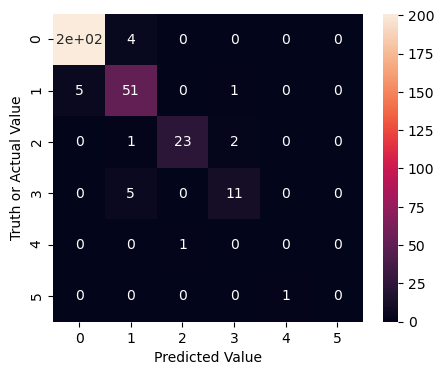

In [ ]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize = (5,4))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Truth or Actual Value')